In [1]:
# Librerías
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Cargar datos desde un archivo CSV
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv(url, delim_whitespace=True, names=column_names)

## El conjunto de datos de vivienda de Boston

El conjunto de datos de vivienda de Boston se deriva de la información recopilada por el Servicio del Censo de EE. UU. sobre viviendas en el área de Boston MA.

- CRIM: tasa de criminalidad per cápita por ciudad
- ZN: proporción de suelo residencial zonificado para lotes de más de 25.000 pies cuadrados.
- INDUS: proporción de acres de negocios no minoristas por ciudad.
- CHAS: Variable ficticia de Charles River (1 si el tramo limita con el río; 0 en caso contrario)
- NOX: concentración de óxidos nítricos (partes por 10 millones)
- RM: número medio de habitaciones por vivienda
- EDAD: proporción de unidades ocupadas por sus propietarios construidas antes de 1940
- DIS: distancias ponderadas a cinco centros de empleo de Boston
- RAD: índice de accesibilidad a carreteras radiales
- IMPUESTO: tasa de impuesto a la propiedad de valor total por $10,000
- PTRATIO: ratio alumnos-maestro por ciudad
- B: 1000(Bk - 0,63)^2 donde Bk es la proporción de negros por ciudad
- LSTAT: % de estatus inferior de la población
- MEDV: Valor medio de viviendas ocupadas por sus propietarios en miles de dólares

In [3]:
# Agregar algunos valores atípicos y datos faltantes para fines de demostración

# Valores atípicos
data.loc[0, 'CRIM'] = 100  # Tasa de criminalidad muy alta
data.loc[10, 'MEDV'] = 500  # Precio de la vivienda muy alto

# Datos faltantes
data.loc[5:10, 'ZN'] = np.nan  # Zona residencial desconocida
data.loc[20:25, 'AGE'] = np.nan  # Edad de la propiedad desconocida

In [4]:
# Resumen estadístico
summary_stats = data.describe()
print(summary_stats)

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  500.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.811140   11.375000   11.136779    0.069170    0.554695    6.284634   
std      9.608248   23.456455    6.860353    0.253994    0.115878    0.702617   
min      0.009060    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082268    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.260420    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.689388   12.500000   18.100000    0.000000    0.624000    6.623500   
max    100.000000  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  500.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.280200    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.182533    2.1057

# Visualización de datos

## Gráficos Univariados

### Histograma
El histograma es uno de los métodos gráficos más antiguos para presentar información univariada.

Los datos se agrupan en clases o intervalos que se señalan en el eje horizontal, mientras que en el vertical se coloca alguna medida indicativa de la cantidad de observaciones en cada intervalo.

Si se grafica la frecuencia absoluta o relativa, todos los intervalos deben tener la misma amplitud para que la representación sea válida. En caso contrario, se debe graficar la densidad (frecuencia relativa de una clase sobre su amplitud).

No olvidar que un histograma **no es un gráfico de barras**. Es una estimación de la función de densidad de la variable.

La descripción de la distribución lograda depende de la amplitud elegida para los intervalos.

Si la amplitud es muy pequeña, el histograma presentará muchos picos y se oscurecerá la visualización de la forma general de la distribución.
Por el contrario, si la amplitud es muy grande, pueden perderse algunas características de la misma.

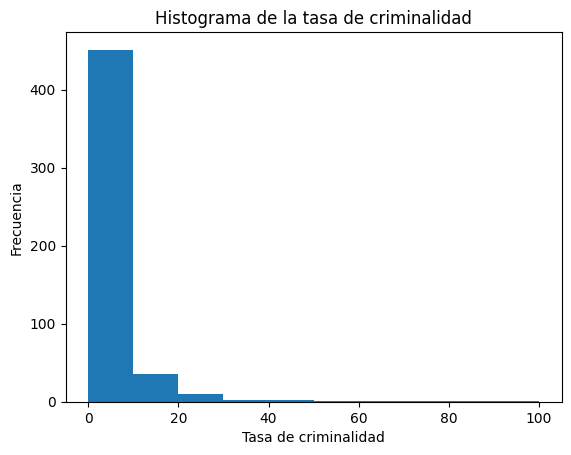

In [5]:
# Histograma
plt.hist(data['CRIM'], bins=10)
plt.title('Histograma de la tasa de criminalidad')
plt.xlabel('Tasa de criminalidad')
plt.ylabel('Frecuencia')
plt.show()

### Boxplot o diagrama de caja
El boxplot es una de las herramientas más populares para representar la distribución de una variable cuantitativa, principalmente porque permite comparar grupos con facilidad.

Los elementos que componen a un boxplot son:

- Caja: se extiende desde el cuartil inferior o Q1
 (cuantil 0.25) hasta el cuartil superior o Q3
 (cuantil 0.75). Su longitud es el rango intercuartil y representa el recorrido del 50% central de los valores.

- Mediana: representada con una línea en el interior de la caja.

- Bigotes: se extienden desde la caja hasta el valor mínimo y máximo observado. Opcionalmente, se extienden hasta el valor adyacente inferior (menor observación mayor o igual que Q1−1.5×RI
) y el valor adyacente superior (mayor observación menor o igual que Q3+1.5×RI
).

- Valores externos: observaciones más allá de los valores adyacentes. Se grafican en forma individual y pueden no existir, cuando los valores adyacentes coinciden con el mínimo o el máximo.

Las distancias de los cuartiles a la mediana dan información acerca de la forma de la distribución.
- Si una distancia es mayor a la otra, la distribución es asimétrica.
- Si existen outliers (observaciones muy grandes o muy pequeñas), aparecen como valores externos.

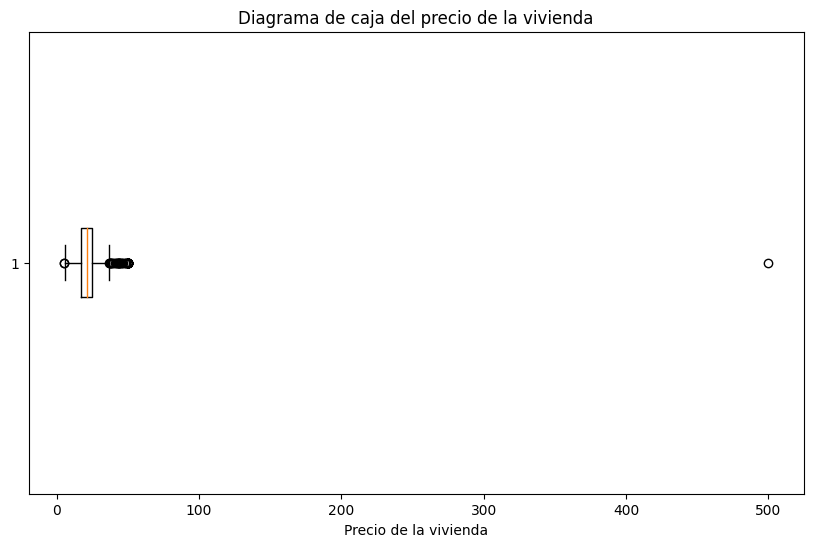

In [ ]:
# Diagrama de caja
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.boxplot(data['MEDV'], vert=False)
plt.title('Diagrama de caja del precio de la vivienda')
plt.xlabel('Precio de la vivienda')
plt.show()

### Gráficos de violines
Los gráficos de violines persiguen el mismo objetivo que los boxplots, pero mostrando en lugar de cajas, curvas de densidad.

En estos gráficos, las curvas de densidad se rotan 90 grados y se dibujan en espejo (la misma curva enfrentada). El aspecto resultante le da el nombre de violín al gráfico.

Comienzan y terminan en el mínimo y máximo valor observado, respectivamente.
Los violines pueden mostrar más matices de las distribuciones.

Su uso se justifica si se tiene una suficiente cantidad de datos como para que la estimación de la densidad sea precisa.

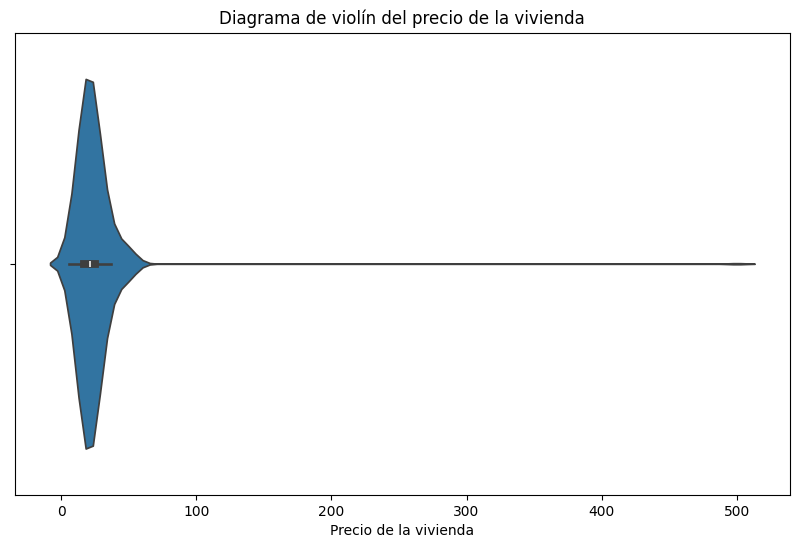

In [ ]:
# Diagrama de violín
plt.figure(figsize=(10, 6))  # Tamaño de la figura
sns.violinplot(x=data['MEDV'])
plt.title('Diagrama de violín del precio de la vivienda')
plt.xlabel('Precio de la vivienda')
plt.show()

## Gráficos Bivariados
Cuando se tienen dos variables, generalmente interesa explorar la relación existente entre ellas.

### Diagramas de dispersión
El diagrama de dispersión suele emplearse como primera herramienta exploratoria cuando se desea estudiar la relación entre dos variables cuantitativas.

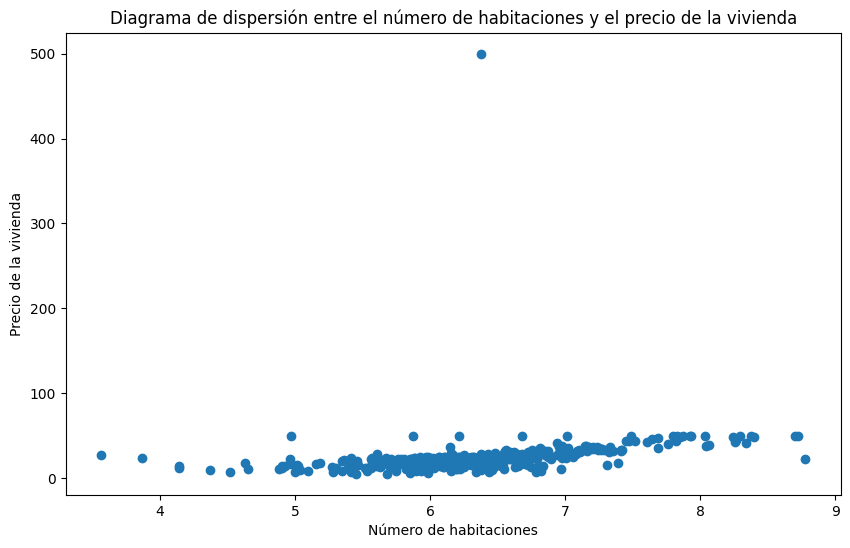

In [6]:
# Gráfico de dispersión entre RM y MEDV
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.scatter(data['RM'], data['MEDV'])
plt.title('Diagrama de dispersión entre el número de habitaciones y el precio de la vivienda')
plt.xlabel('Número de habitaciones')
plt.ylabel('Precio de la vivienda')
plt.show()

# Valores atípicos

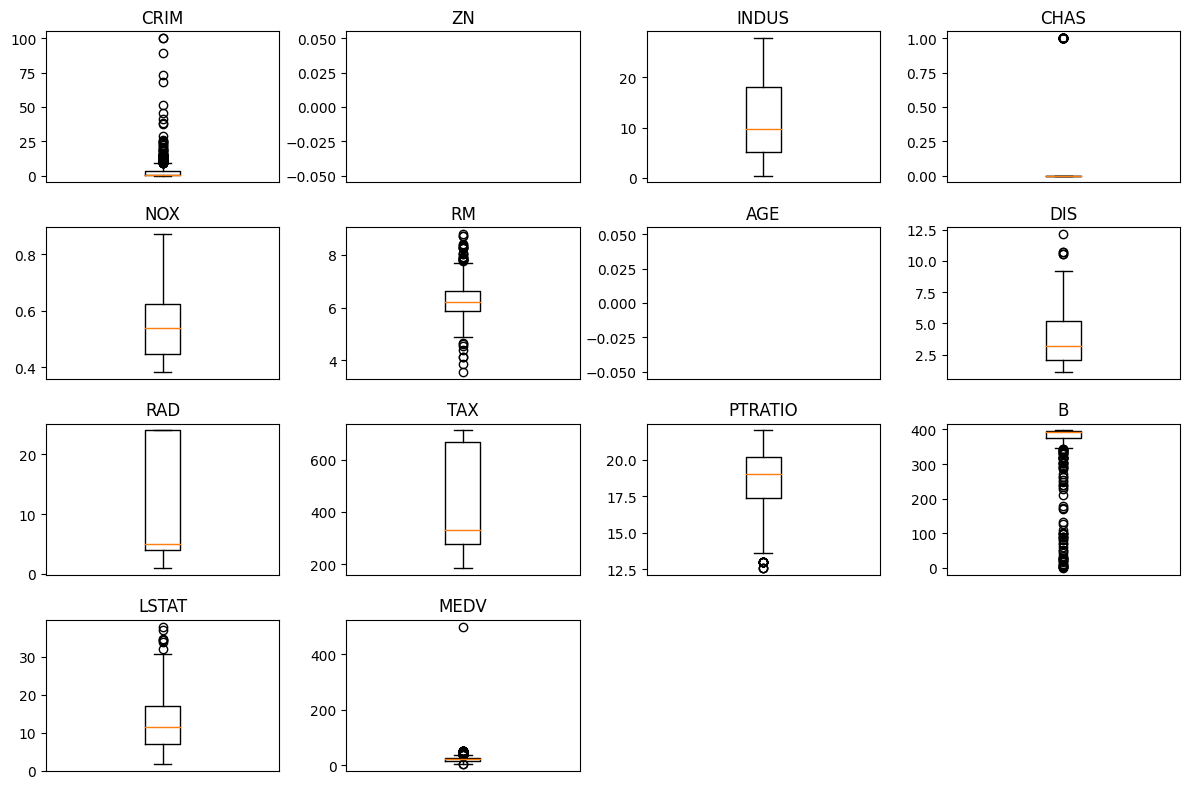

In [ ]:
# Crear diagrama de caja individual para cada variable
plt.figure(figsize=(12, 8))
for i, column in enumerate(data.columns):
    plt.subplot(4, 4, i+1)
    plt.boxplot(data[column])
    plt.title(column)
    plt.xticks([])  # Eliminar marcas en el eje x
plt.tight_layout()
plt.show()

# Datos faltantes

In [7]:
# Librerías
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [8]:
# Cargando el conjunto de datos Iris
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names

# Introduciendo valores faltantes artificialmente
X_with_missing = X.copy()
X_with_missing[0:10, 0] = np.nan  # Establecer algunos valores de la primera característica a NaN

# Convertir a DataFrame de pandas para facilitar el manejo
df = pd.DataFrame(X_with_missing, columns=feature_names)

In [11]:
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  NaN               3.5                1.4               0.2
1                  NaN               3.0                1.4               0.2
2                  NaN               3.2                1.3               0.2
3                  NaN               3.1                1.5               0.2
4                  NaN               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


## Eliminación de datos

In [12]:
# Eliminación de datos con fines didácticos
df_dropna = df.dropna()
print("DataFrame después de eliminar filas con valores faltantes:")
print(df_dropna)

DataFrame después de eliminar filas con valores faltantes:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
10                 5.4               3.7                1.5               0.2
11                 4.8               3.4                1.6               0.2
12                 4.8               3.0                1.4               0.1
13                 4.3               3.0                1.1               0.1
14                 5.8               4.0                1.2               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[140

## Imputación
El método SimpleImputer reemplaza los valores faltantes (NaN) en un conjunto de datos con un valor específico, que puede ser una constante, la media, la mediana o la moda de la columna correspondiente.

In [ ]:
# Imputación de valores faltantes
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # Utilizando la media para imputar los valores faltantes
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
print("\nDataFrame después de imputar valores faltantes con la media:")
print(df_imputed.head())


DataFrame después de imputar valores faltantes con la media:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           5.913571               3.5                1.4               0.2
1           5.913571               3.0                1.4               0.2
2           5.913571               3.2                1.3               0.2
3           5.913571               3.1                1.5               0.2
4           5.913571               3.6                1.4               0.2


## Basado en modelos (KNN)
 Este enfoque utiliza el algoritmo de los k-vecinos más cercanos para encontrar los vecinos más cercanos de cada punto con valor faltante y luego estimar el valor faltante utilizando los valores observados de esos vecinos.

In [ ]:
# Método basado en modelos (K-Vecinos más cercanos)
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer()
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)
print("\nDataFrame después de la imputación basada en K-Vecinos más cercanos:")
print(df_knn_imputed.head())


DataFrame después de la imputación basada en K-Vecinos más cercanos:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0               5.20               3.5                1.4               0.2
1               4.78               3.0                1.4               0.2
2               4.68               3.2                1.3               0.2
3               4.80               3.1                1.5               0.2
4               5.18               3.6                1.4               0.2


#Valores atípicos

In [ ]:
# Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import PowerTransformer
from scipy.stats import zscore
from scipy import stats

In [ ]:
# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

# Agregar outliers al conjunto de datos
np.random.seed(0)
X_outliers = np.random.uniform(low=-10, high=10, size=(10, X.shape[1]))
y_outliers = np.random.randint(low=0, high=3, size=10)
X = np.vstack([X, X_outliers])
y = np.concatenate([y, y_outliers])

### 2.a | Elimianción

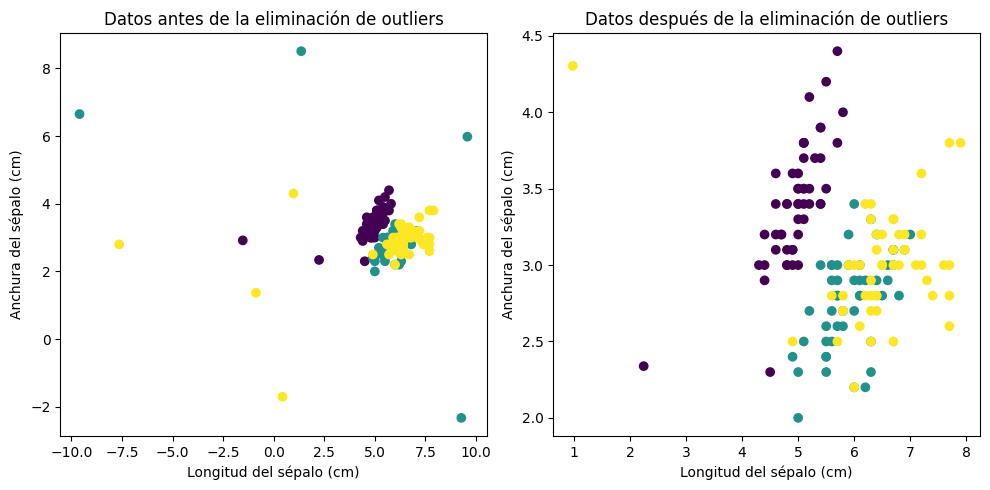

In [ ]:
# Visualización de datos antes de la eliminación de outliers
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Longitud del sépalo (cm)')
plt.ylabel('Anchura del sépalo (cm)')
plt.title('Datos antes de la eliminación de outliers')

# Eliminación de outliers utilizando el método de los cuartiles
z_scores = stats.zscore(X)
outliers_mask = (np.abs(z_scores) < 3).all(axis=1)  # Consideramos outliers aquellos que están a menos de 3 desviaciones estándar
X_clean = X[outliers_mask]
y_clean = y[outliers_mask]

# Visualización de datos después de la eliminación de outliers
plt.subplot(1, 2, 2)
plt.scatter(X_clean[:, 0], X_clean[:, 1], c=y_clean, cmap='viridis')
plt.xlabel('Longitud del sépalo (cm)')
plt.ylabel('Anchura del sépalo (cm)')
plt.title('Datos después de la eliminación de outliers')

plt.tight_layout()
plt.show()

### 2.b | Transformación
#### yeo-johnson
 La transformación se realiza para hacer que las características sigan una distribución más gaussiana o normal. Este tipo de transformación puede ser útil cuando se trabaja con algoritmos de aprendizaje automático que asumen una distribución normal de las características, como la regresión lineal o los modelos basados en árboles.

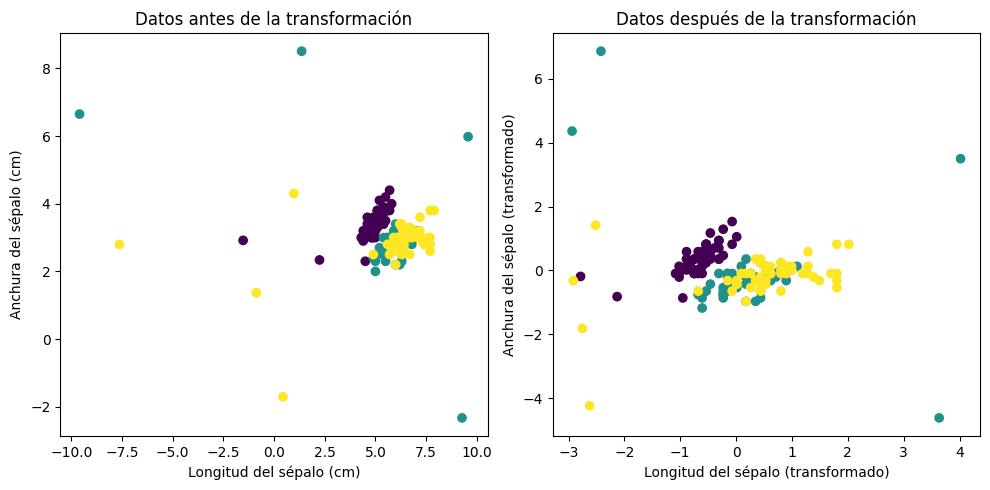

In [ ]:
# Visualización de datos antes de la transformación
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Longitud del sépalo (cm)')
plt.ylabel('Anchura del sépalo (cm)')
plt.title('Datos antes de la transformación')

# Aplicar la transformación de potencia
pt = PowerTransformer(method='yeo-johnson')  # Usamos 'yeo-johnson' para manejar valores negativos
X_transformed = pt.fit_transform(X)

# Visualización de datos después de la transformación
plt.subplot(1, 2, 2)
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap='viridis')
plt.xlabel('Longitud del sépalo (transformado)')
plt.ylabel('Anchura del sépalo (transformado)')
plt.title('Datos después de la transformación')

plt.tight_layout()
plt.show()

### 2.c | Truncamiento
Esta técnica se utiliza para controlar y limitar la variabilidad de los datos, así como para mitigar el impacto de valores extremos o atípicos en el análisis de datos o en la construcción de modelos.

- Definir límites: Se definen límites superiores e inferiores para cada variable en el conjunto de datos. Estos límites pueden ser valores específicos, percentiles de los datos o basados en algún criterio objetivo.

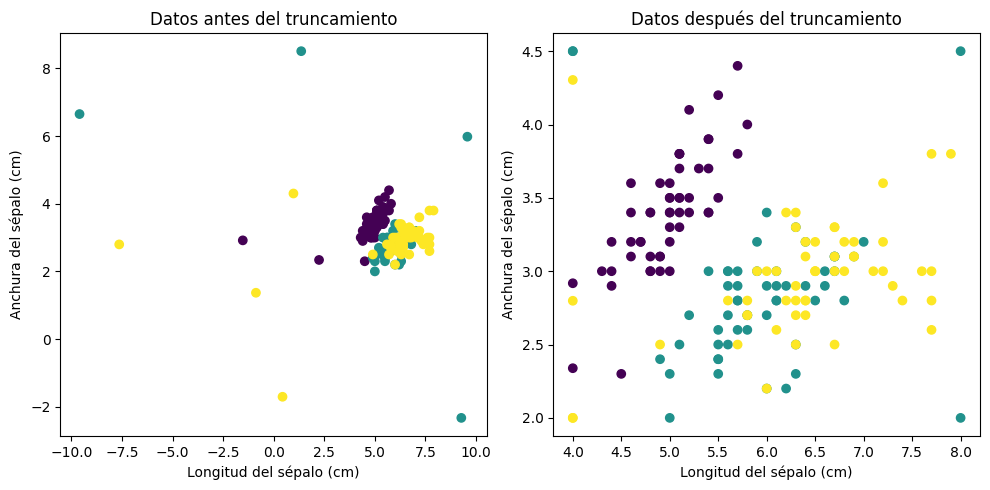

In [ ]:
# Truncar datos utilizando límites predefinidos
lower_bound = np.array([4.0, 2.0, 1.0, 0.0])  # Límites inferiores arbitrarios
upper_bound = np.array([8.0, 4.5, 7.0, 3.0])  # Límites superiores arbitrarios

X_truncated = np.clip(X, lower_bound, upper_bound)

# Visualización de datos antes y después del truncamiento
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Longitud del sépalo (cm)')
plt.ylabel('Anchura del sépalo (cm)')
plt.title('Datos antes del truncamiento')

plt.subplot(1, 2, 2)
plt.scatter(X_truncated[:, 0], X_truncated[:, 1], c=y, cmap='viridis')
plt.xlabel('Longitud del sépalo (cm)')
plt.ylabel('Anchura del sépalo (cm)')
plt.title('Datos después del truncamiento')

plt.tight_layout()
plt.show()

### 2.d | Imputación
Cuando se utiliza el SimpleImputer con la estrategia 'median' para manejar valores atípicos, la mediana se utiliza como un reemplazo robusto para los valores atípicos. Dado que la mediana es menos sensible a los valores atípicos que la media, su uso para imputar valores atípicos puede ayudar a mitigar su influencia en el análisis de datos o en la construcción de modelos.

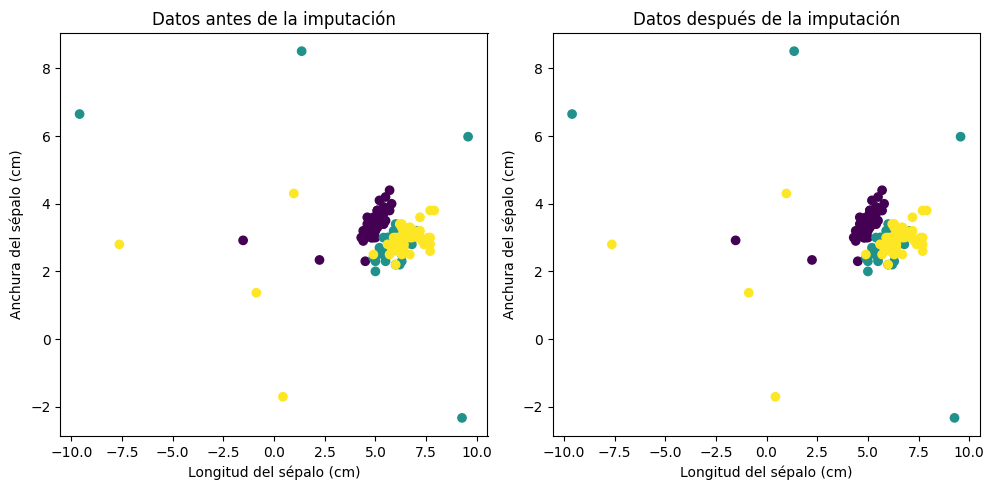

In [ ]:
# Imputación de datos utilizando la mediana
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Visualización de datos antes y después de la imputación
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Longitud del sépalo (cm)')
plt.ylabel('Anchura del sépalo (cm)')
plt.title('Datos antes de la imputación')

plt.subplot(1, 2, 2)
plt.scatter(X_imputed[:, 0], X_imputed[:, 1], c=y, cmap='viridis')
plt.xlabel('Longitud del sépalo (cm)')
plt.ylabel('Anchura del sépalo (cm)')
plt.title('Datos después de la imputación')

plt.tight_layout()
plt.show()

### 2.e | Modelos específicos
La imputación de valores atípicos utilizando el RandomForestClassifier implica entrenar el modelo en un conjunto de datos que contiene valores atípicos. Dado que los bosques aleatorios son robustos a los valores atípicos y al sobreajuste, pueden ser útiles para tratar con datos que contienen valores extremos.

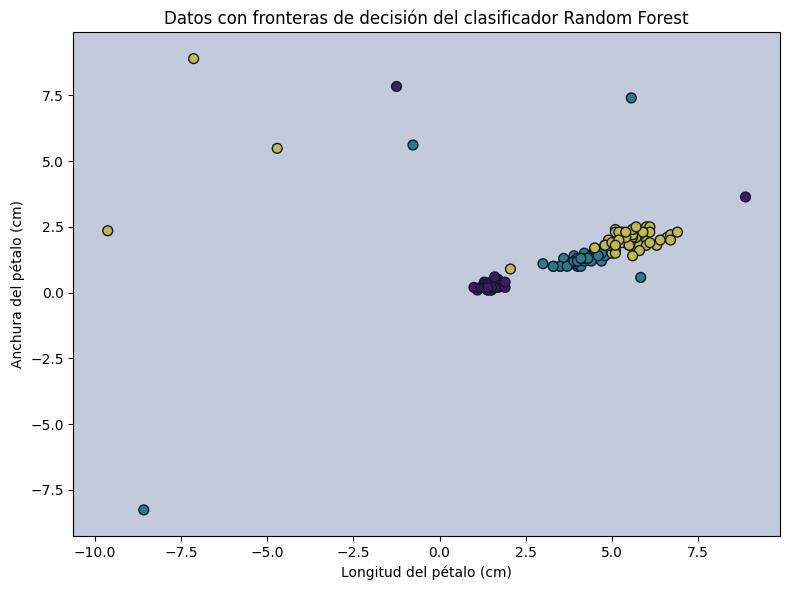

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Entrenar un clasificador de Random Forest
clf = RandomForestClassifier(random_state=0)
clf.fit(X, y)

# Visualización de datos y fronteras de decisión
plt.figure(figsize=(8, 6))

# Visualización de datos
plt.scatter(X[:, 2], X[:, 3], c=y, cmap='viridis', edgecolors='k', s=50)
plt.xlabel('Longitud del pétalo (cm)')
plt.ylabel('Anchura del pétalo (cm)')
plt.title('Datos con fronteras de decisión del clasificador Random Forest')

# Crear una malla para la visualización de la frontera de decisión
xx, yy = np.meshgrid(np.linspace(X[:, 2].min() - 1, X[:, 2].max() + 1, 100),
                     np.linspace(X[:, 3].min() - 1, X[:, 3].max() + 1, 100))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel())])
Z = Z.reshape(xx.shape)

# Visualización de las fronteras de decisión
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

plt.tight_layout()
plt.show()